In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from metropolis import run_metropolis

In [2]:
N_arr = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
t_arr = []
iters_arr = []
n_repetitions = 10

np.random.seed(42)
for N in N_arr:
    t_arr_arr = []
    iters_arr_arr = []
    for _ in range(n_repetitions):
        t = time()
        iters, queens = run_metropolis(
            N,
            1000000,
            0.01,
            "annealing_quantized",
            {"iterations_step": 1000, "annealing_factor": 2},
            debug=False
        )
        t_arr_arr.append(time() - t)
        iters_arr_arr.append(iters)
    t_arr.append((t_arr_arr))
    iters_arr.append((iters_arr_arr))
    print(f"Solution found in {iters} moves, {time() - t:e} seconds.")

Solution found in 5 moves, 0.000000e+00 seconds.
Solution found in 484 moves, 4.330754e-02 seconds.
Solution found in 7046 moves, 3.147671e-01 seconds.
Solution found in 9338 moves, 4.130177e-01 seconds.
Solution found in 11842 moves, 7.674472e-01 seconds.
Solution found in 10999 moves, 6.556003e-01 seconds.
Solution found in 43390 moves, 2.941911e+00 seconds.
Solution found in 64768 moves, 6.040751e+00 seconds.
Solution found in 104839 moves, 2.093513e+01 seconds.


In [3]:
t_df = pd.DataFrame(t_arr, index=N_arr, columns=range(n_repetitions)).T
t_df = t_df.melt(var_name="N", value_name="time")
iters_df = pd.DataFrame(iters_arr, index=N_arr, columns=range(n_repetitions)).T
iters_df = iters_df.melt(var_name="N", value_name="iters")

In [4]:
# Save dataframes
t_df.to_csv("data/times.csv")
iters_df.to_csv("data/iters.csv")

In [5]:
# Load dataframes
t_df = pd.read_csv("data/times.csv")
iters_df = pd.read_csv("data/iters.csv")

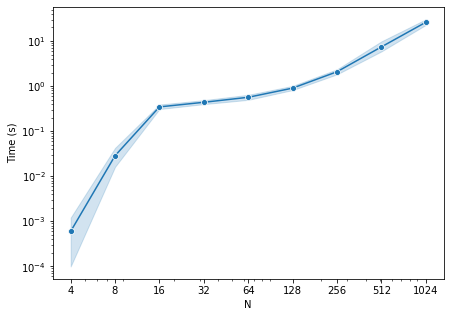

In [11]:
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="time", data=t_df, marker="o")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Time (s)")
plt.xticks(N_arr, N_arr)
plt.savefig("figures/times.png")
plt.show()

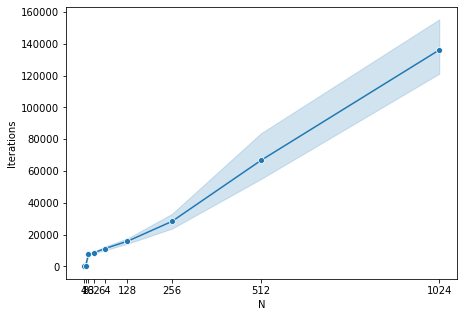

In [10]:
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="iters", data=iters_df, marker="o")

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Iterations")
plt.xticks(N_arr, N_arr)
plt.savefig("figures/iters.png")
plt.show()